In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/Users/aditineve/Desktop/Code alpha/Unemployment_Rate_upto_11_2020.csv")


In [6]:
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [10]:
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [13]:
df.shape


(267, 9)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [17]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [19]:
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate'
}, inplace=True)


In [21]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [23]:
df['Unemployment_Rate'] = pd.to_numeric(df['Unemployment_Rate'], errors='coerce')


In [25]:
df.isnull().sum()


Region                                     0
Date                                       0
Frequency                                  0
Unemployment_Rate                          0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64

In [27]:
df.dropna(inplace=True)


In [29]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [31]:
yearly_avg = df.groupby('Year')['Unemployment_Rate'].mean()
print(yearly_avg)


Year
2020    12.236929
Name: Unemployment_Rate, dtype: float64


In [35]:
area_avg = df.groupby('Region')['Unemployment_Rate'].mean()
print(area_avg)


Region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name: Unemployment_Rate, dtype: float64


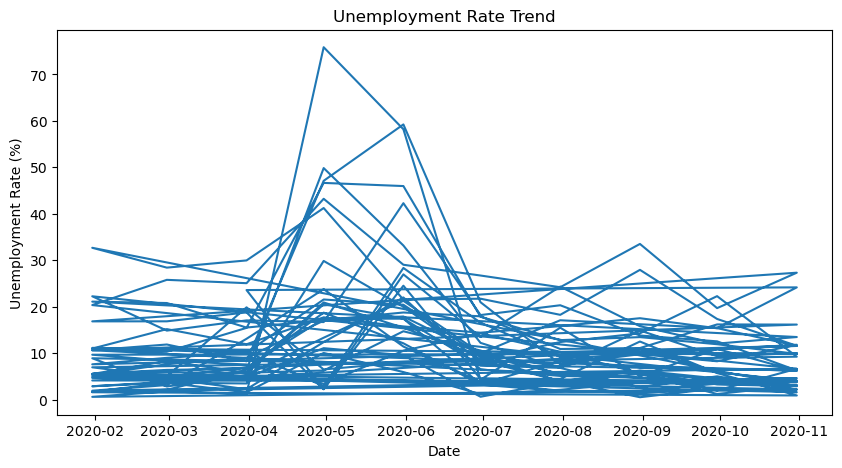

In [37]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Unemployment_Rate'])
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend")
plt.show()


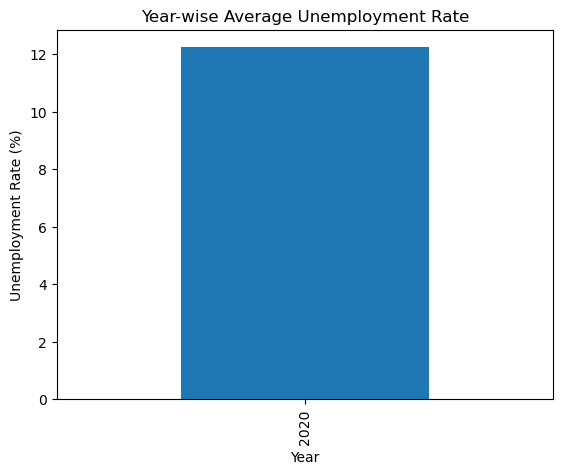

In [39]:
yearly_avg.plot(kind='bar')
plt.title("Year-wise Average Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.show()


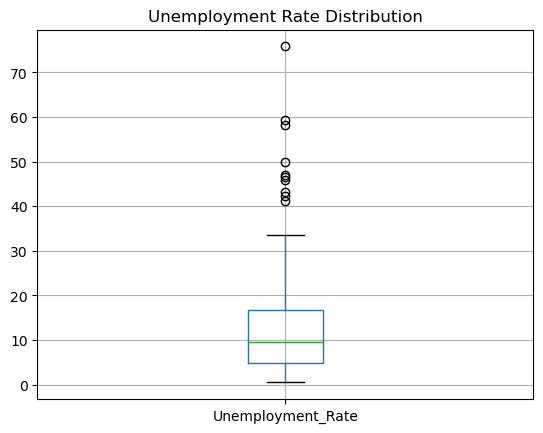

In [41]:
df.boxplot(column='Unemployment_Rate')
plt.title("Unemployment Rate Distribution")
plt.show()


In [43]:
pre_covid = df[df['Date'] < '2020-03-01']
post_covid = df[df['Date'] >= '2020-03-01']

print("Pre-COVID Avg:", pre_covid['Unemployment_Rate'].mean())
print("Post-COVID Avg:", post_covid['Unemployment_Rate'].mean())


Pre-COVID Avg: 9.231346153846154
Post-COVID Avg: 12.963860465116278


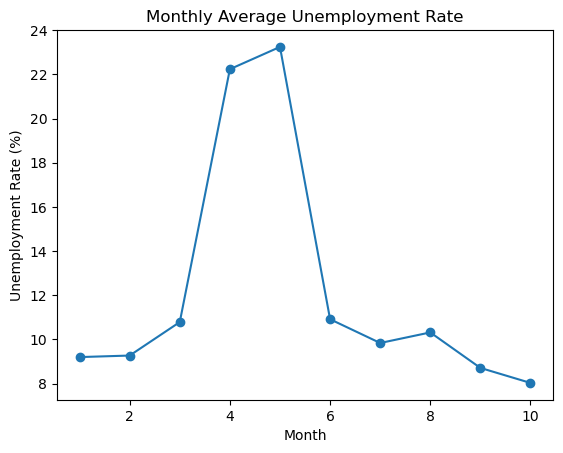

In [45]:
monthly_avg = df.groupby('Month')['Unemployment_Rate'].mean()

monthly_avg.plot(kind='line', marker='o')
plt.title("Monthly Average Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [47]:
top_regions = df.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False).head(5)
low_regions = df.groupby('Region')['Unemployment_Rate'].mean().sort_values().head(5)

print("Highest Unemployment Regions:\n", top_regions)
print("\nLowest Unemployment Regions:\n", low_regions)


Highest Unemployment Regions:
 Region
Haryana      27.477
Tripura      25.055
Jharkhand    19.539
Bihar        19.471
Delhi        18.414
Name: Unemployment_Rate, dtype: float64

Lowest Unemployment Regions:
 Region
Meghalaya    3.866
Assam        4.856
Gujarat      6.376
Odisha       6.462
Telangana    6.833
Name: Unemployment_Rate, dtype: float64


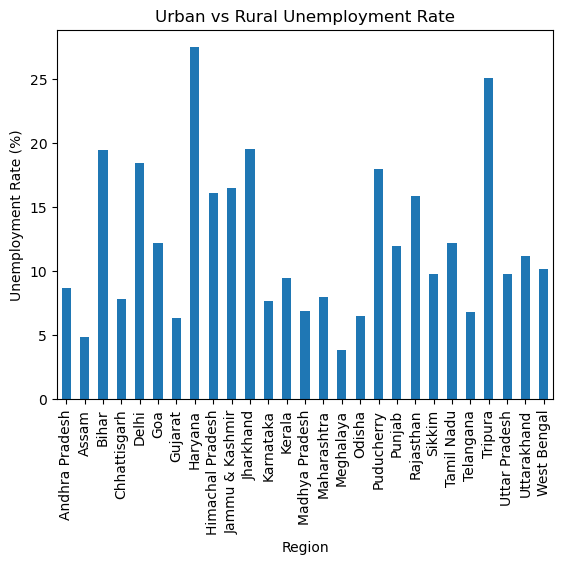

In [51]:
df.groupby('Region')['Unemployment_Rate'].mean().plot(kind='bar')
plt.title("Urban vs Rural Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.show()
